In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

2023-02-11 12:12:50.689522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 12:12:50.917127: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-11 12:12:50.985676: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-11 12:12:51.806867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'with_prior_test'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
DataProcessing = dataset.DataProcessing(config_path=config_path)
Model = model.Model(config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.load_dataset_information()

2023-02-11 12:12:54.453509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 12:12:54.468907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 12:12:54.469092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-11 12:12:54.470298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 200 images.
The TEST DS contains 100 images.
The REAL_WORLD DS contains 861 images.


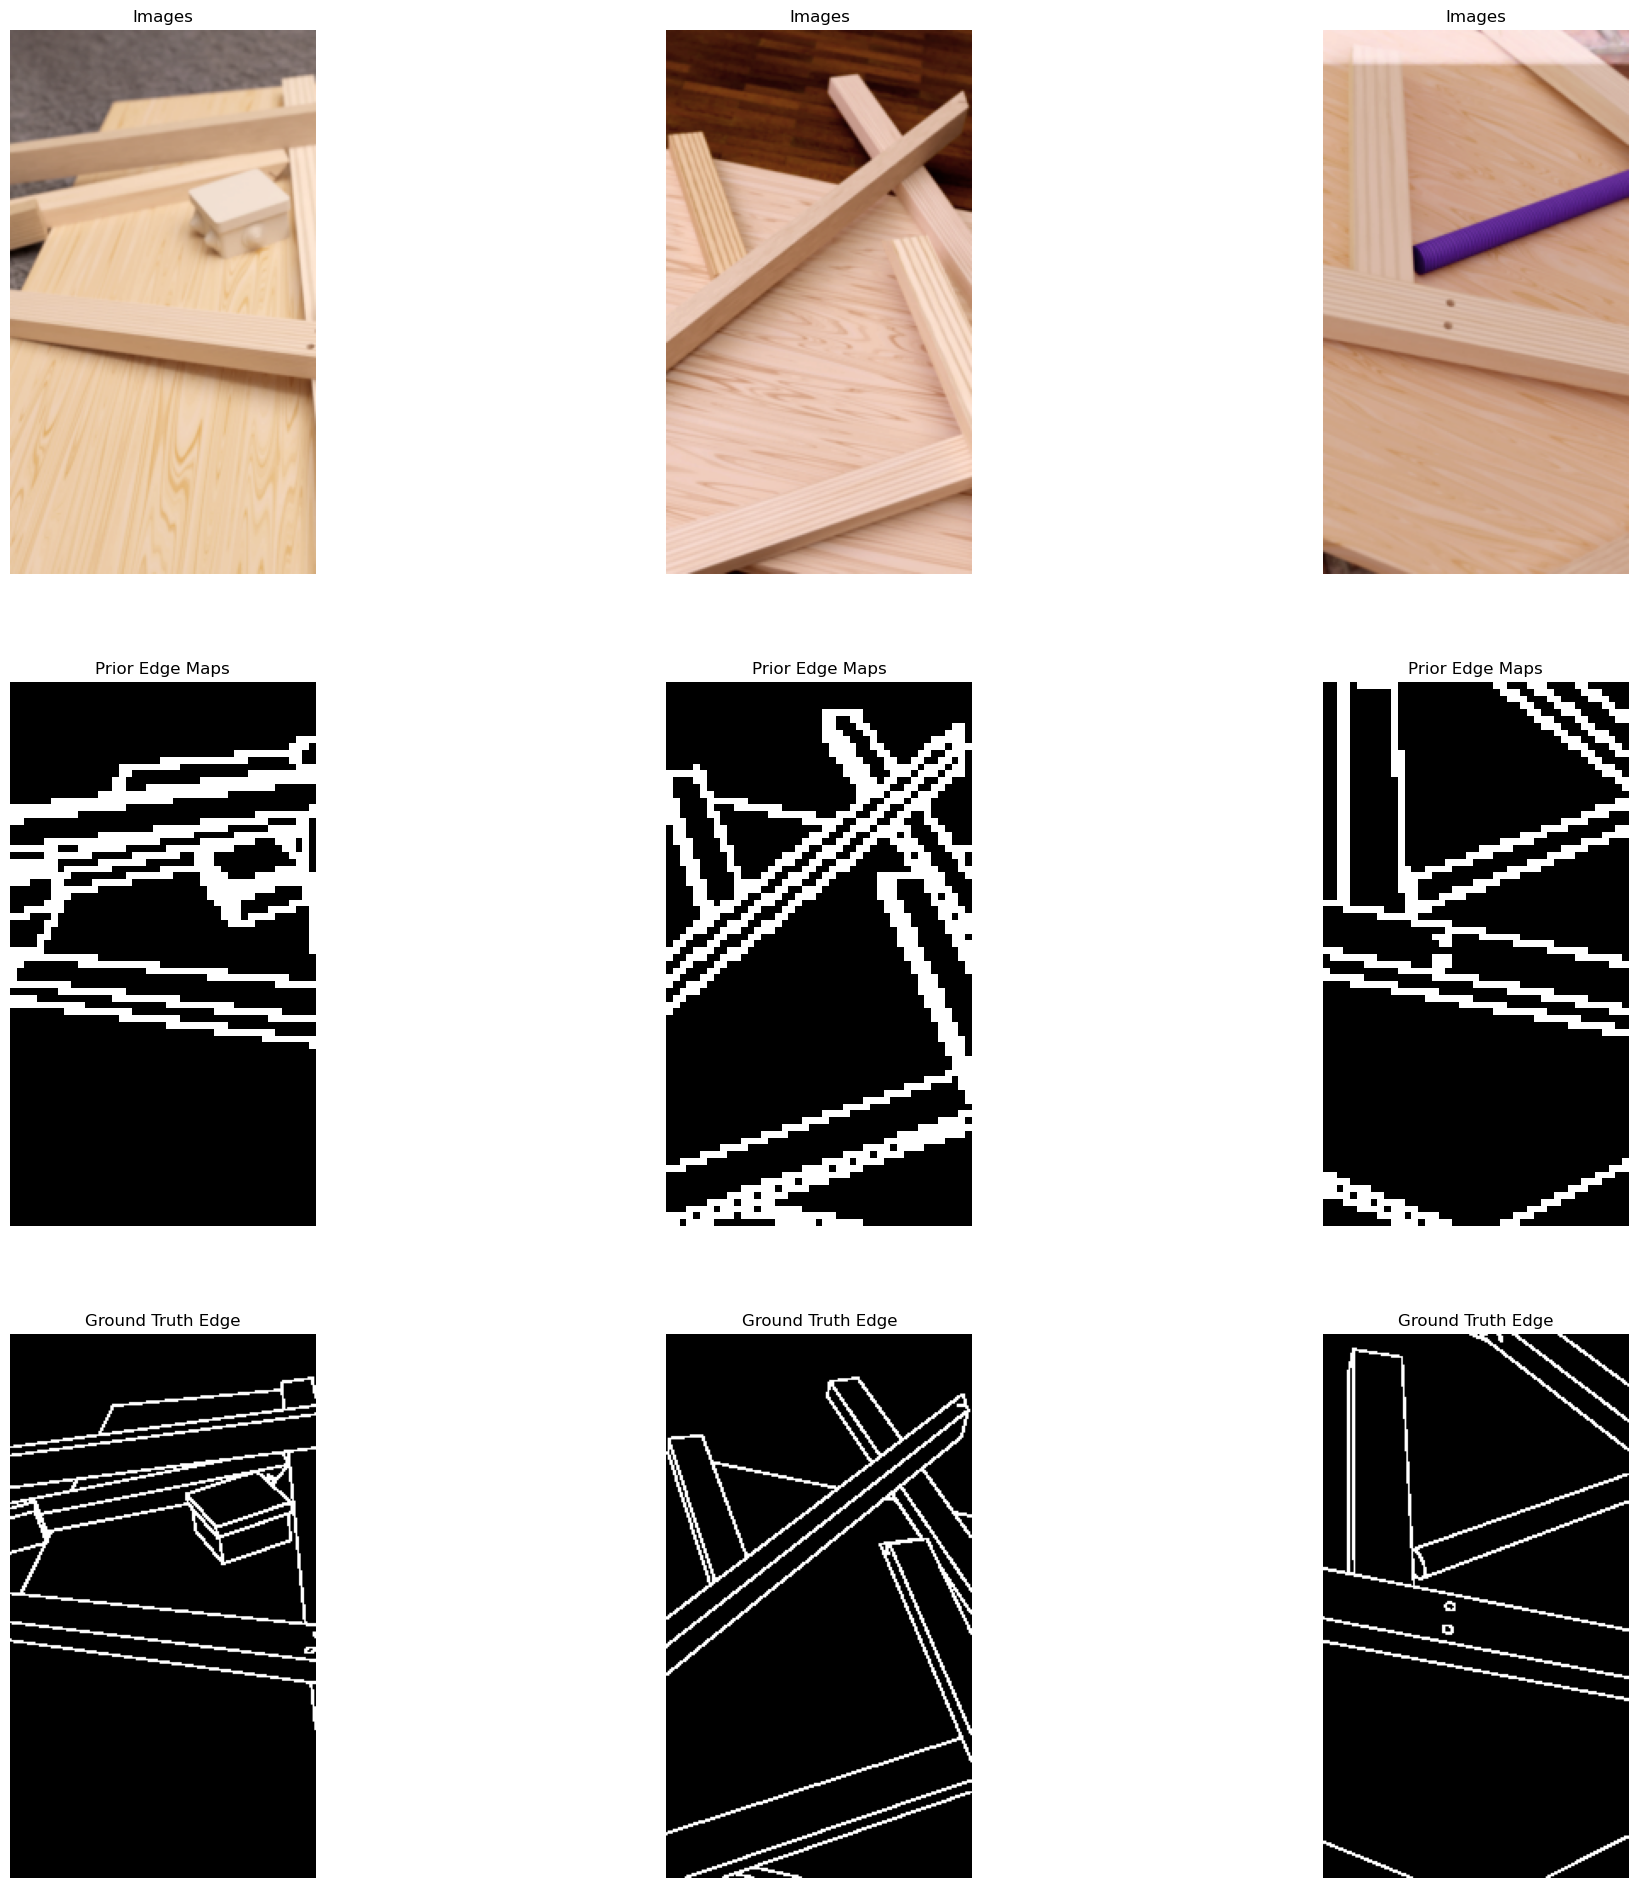

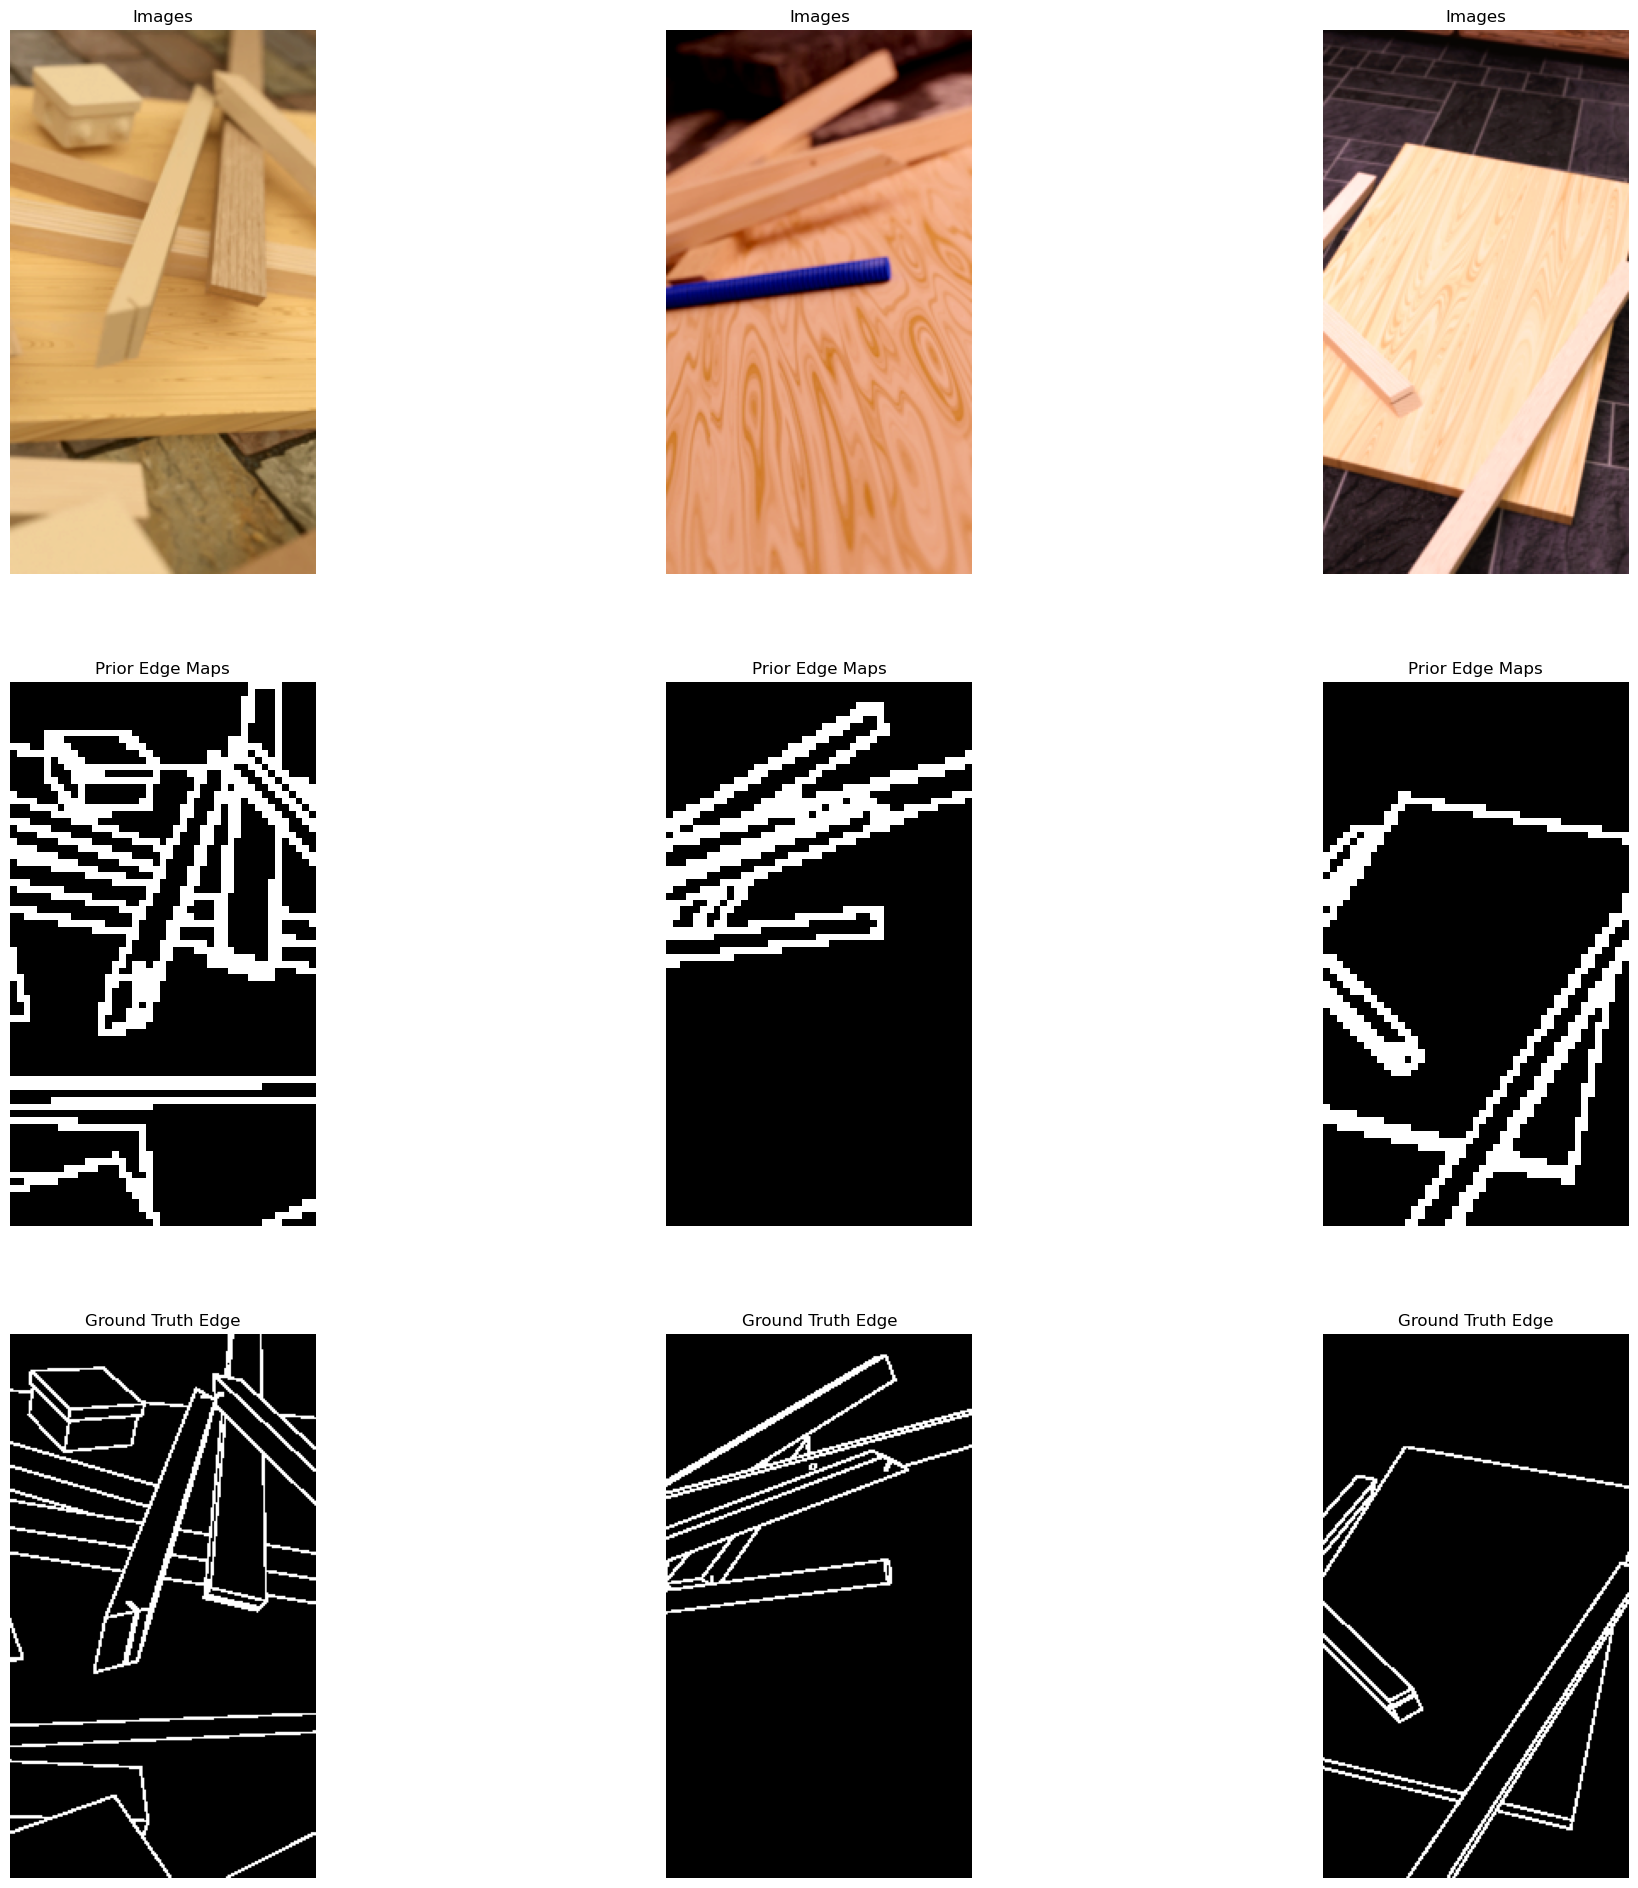

In [3]:
train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

real_world_ds, img_count_real_world_ds = DataProcessing.load_dataset(DataProcessing.key.real_world)

for inp, out in train_ds.take(2):
    edge_detection_plots.plot_edges(images=inp['in_img'], labels_edge=out['out_edge'],
                                    prior = inp['in_edge'],
                                    batch_size=DataProcessing.cfg['TRAIN']['BATCH_SIZE'])

# Define, Compile and Train Model

In [5]:
model = Model.get_best_model_from_checkpoints()

/home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/CKPT/ckpt-loss=1062.33-epoch=150.00-f1=0.9350


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE/assets


In [4]:
model = Model.get_best_model_from_checkpoints()

/home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/CKPT/ckpt-loss=1062.33-epoch=150.00-f1=0.9350


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE/assets


# Plot Results

2023-02-07 13:48:57.191498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-02-07 13:49:01.352533: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Max Accuracy Score = 0.980 at 0.850
MF1 = 0.873
MF1_1 = 0.873, ODS_1 = 0.950
Max Accuracy Score = 0.974 at 0.900
MF1 = 0.797
MF1_1 = 0.797, ODS_1 = 0.950
Max Accuracy Score = 0.973 at 0.900
MF1 = 0.783
MF1_1 = 0.783, ODS_1 = 0.950
Max Accuracy Score = 0.972 at 0.900
MF1 = 0.763
MF1_1 = 0.763, ODS_1 = 0.950
Max Accuracy Score = 0.972 at 0.900
MF1 = 0.750
MF1_1 = 0.750, ODS_1 = 0.950
Max Accuracy Score = 0.971 at 0.900
MF1 = 0.737
MF1_1 = 0.737, ODS_1 = 0.950
Max Accuracy Score = 0.971 at 0.900
MF1 = 0.724
MF1_1 = 0.724, ODS_1 = 0.900
Max Accuracy Score = 0.970 at 0.950
MF1 = 0.717
MF1_1 = 0.717, ODS_1 = 0.950
Max Accuracy Score = 0.970 at 0.950
MF1 = 0.707
MF1_1 = 0.707, ODS_1 = 0.900
Max Accuracy Score = 0.970 at 0.950
MF1 = 0.697
MF1_1 = 0.697, ODS_1 = 0.900
Max Accuracy Score = 0.971 at 0.950
MF1 = 0.703
MF1_1 = 0.703, ODS_1 = 0.900
Max Accuracy Score = 0.970 at 0.950
MF1 = 0.685
MF1_1 = 0.685, ODS_1 = 0.900


KeyboardInterrupt: 

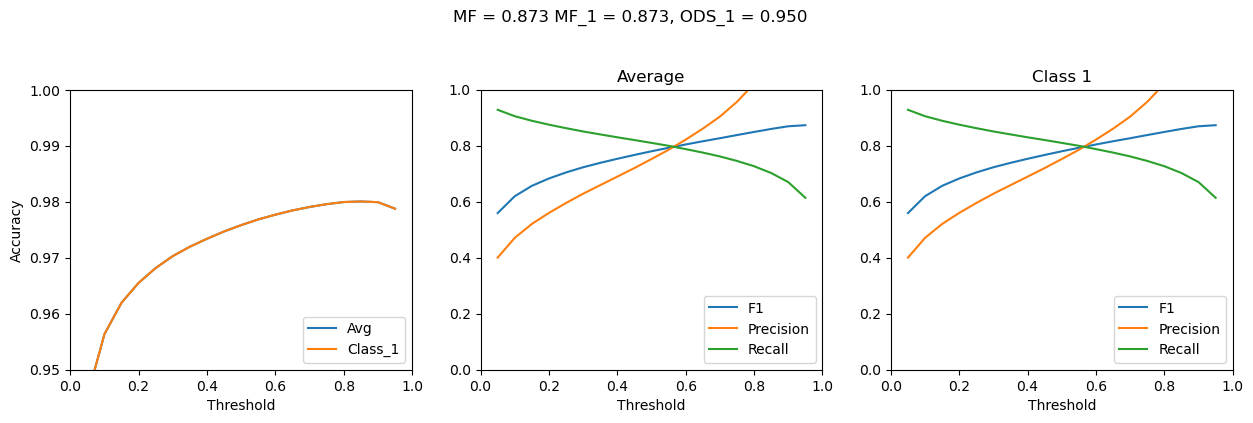

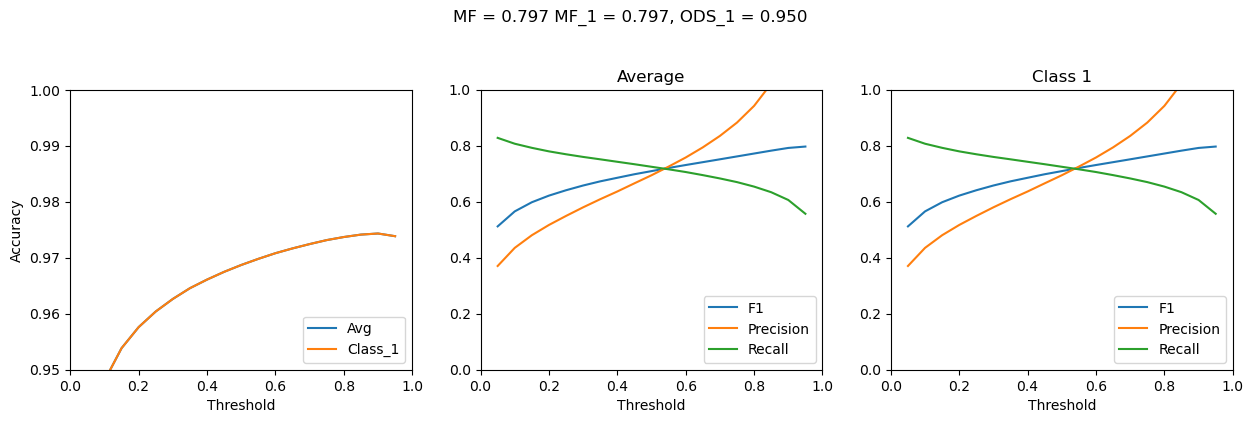

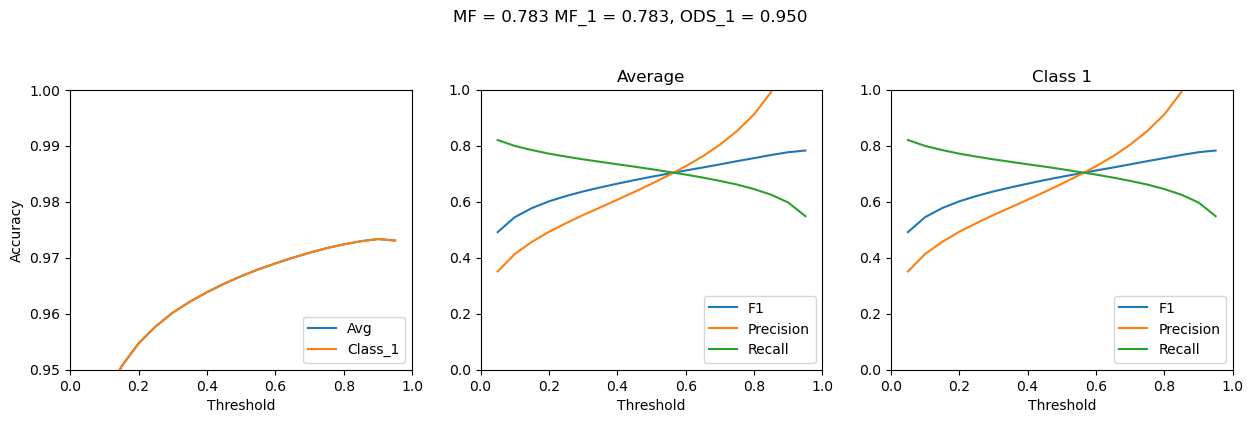

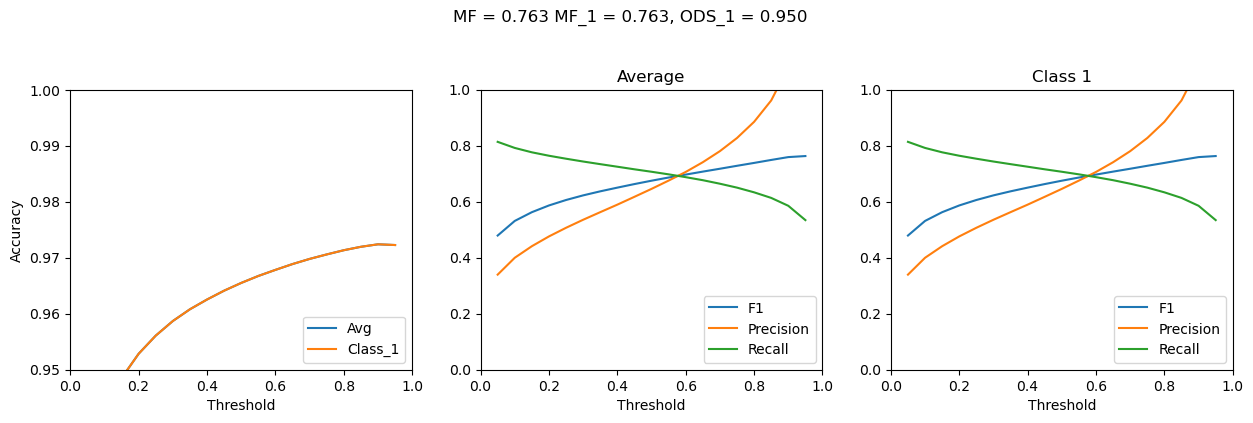

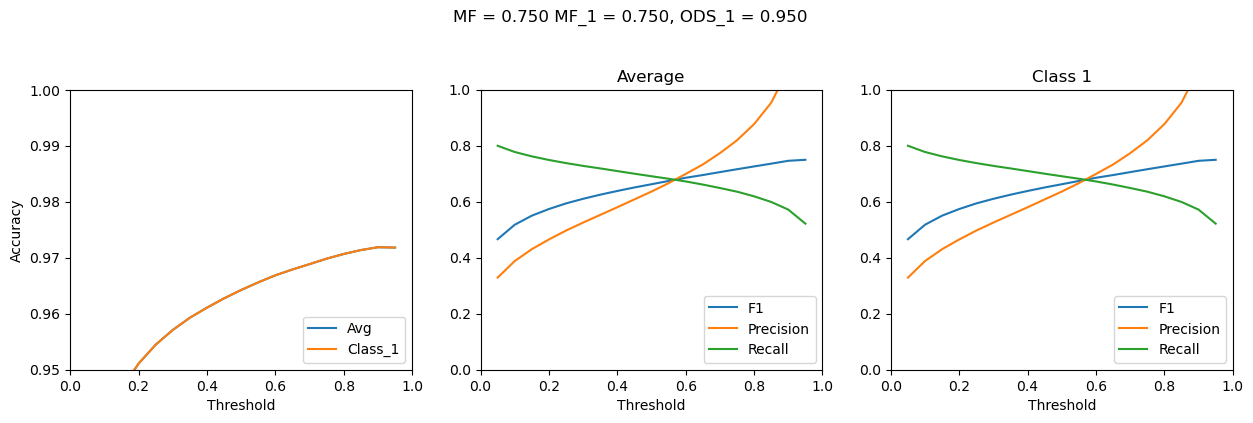

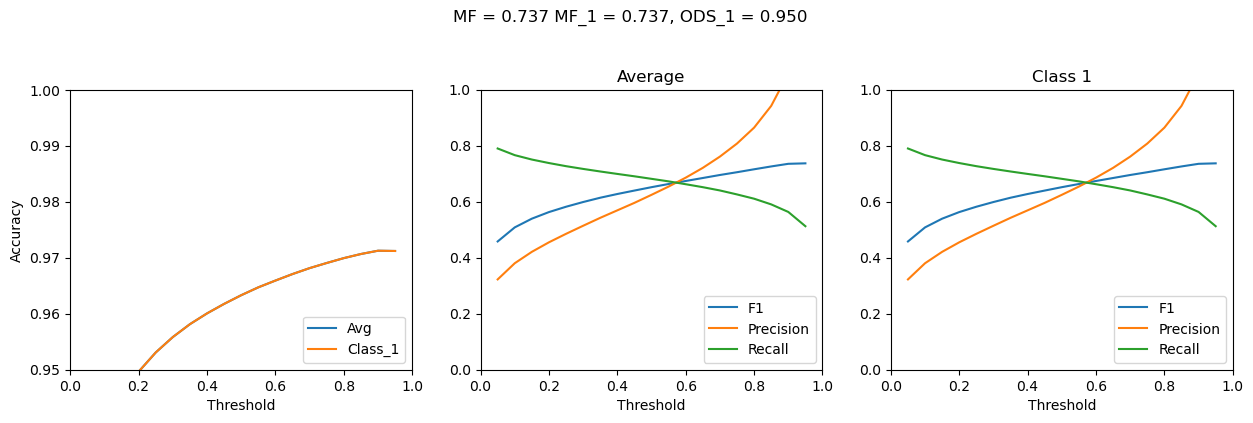

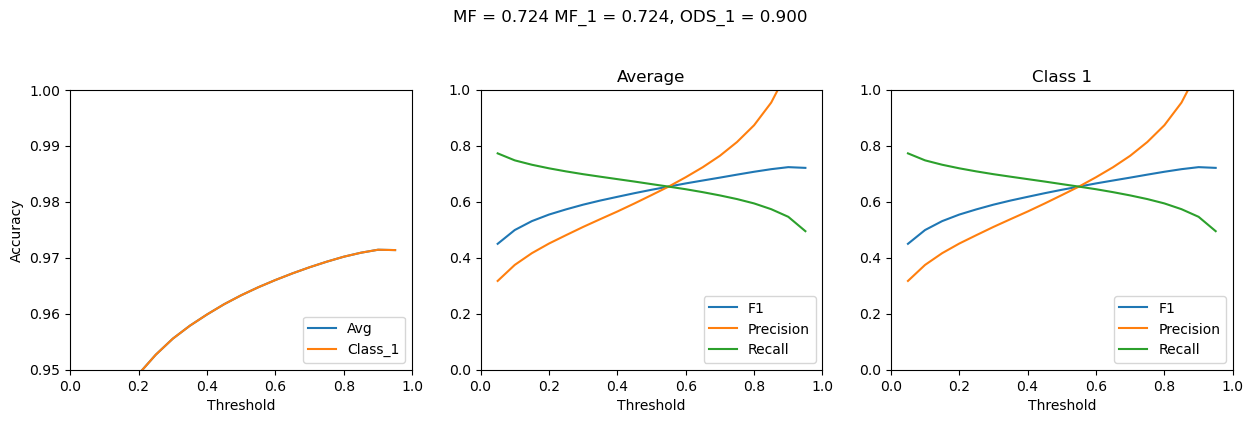

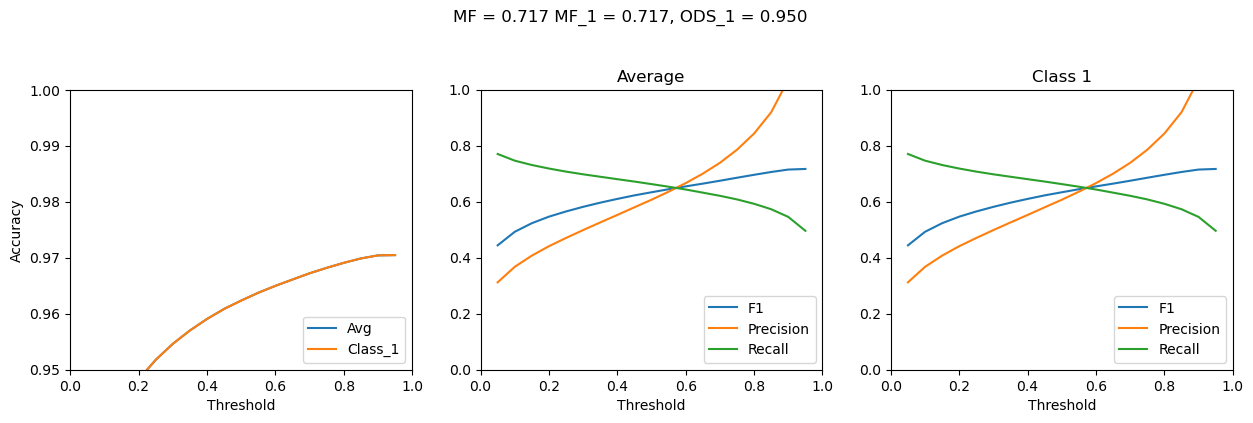

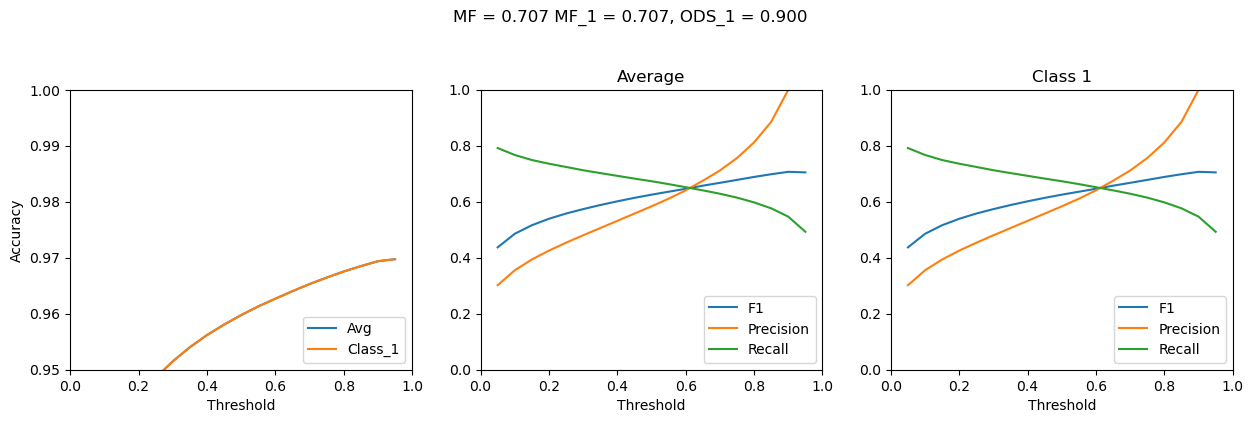

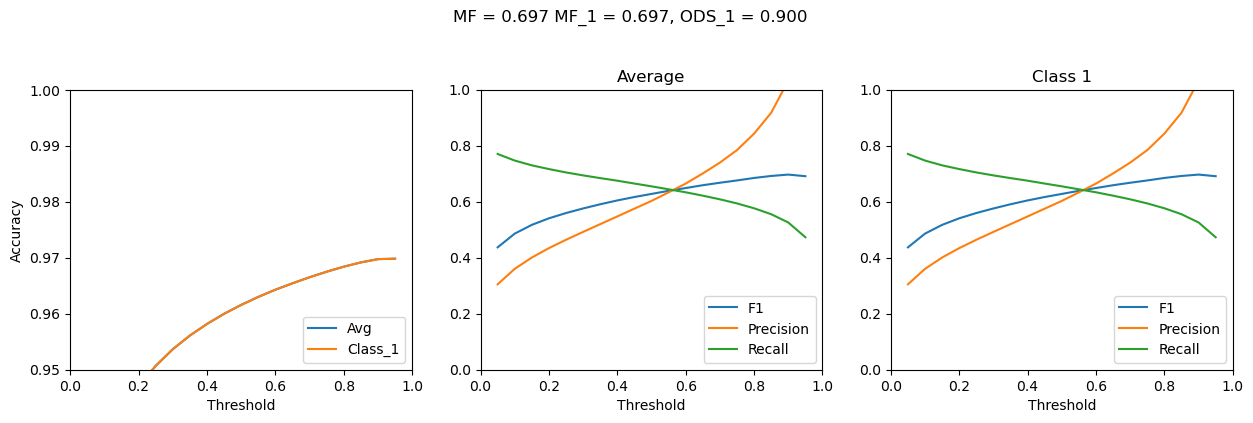

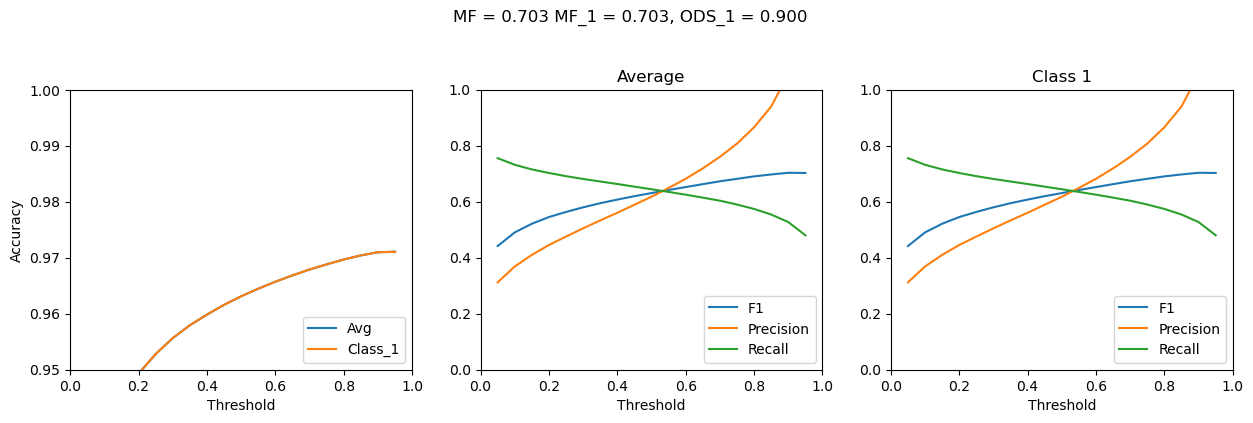

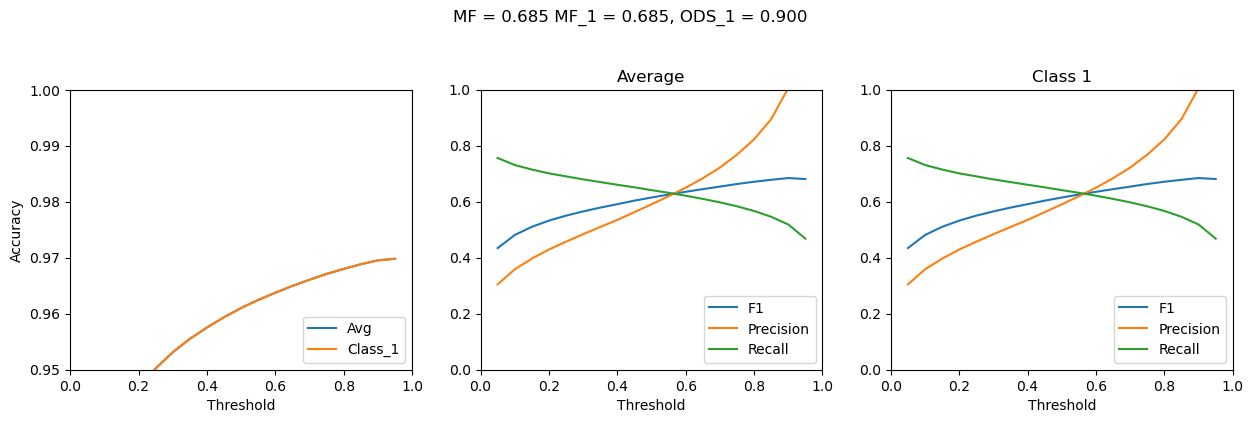

In [6]:
#for i in range(0, 15, 3):
for i in range(19,20):
    ds_small = real_world_ds.skip(41*i).take(41)

    path = os.path.join(Model.Data.paths["FIGURES"],"threshold_metrics_evaluation_width_{}.svg".format(i))

    Model.evaluate_and_plot_MF_score(model=model, dataset=ds_small, 
                                    num_classes=DataProcessing.output_data_cfg["edge"]["num_classes"], 
                                    path=path, threshold_edge_width=2.0)
    
    #j = 0
    #for inp, out in ds_small:
    #    if j not in [2, 7, 17, 33, 26]:
    #        j += 1
    #        continue
    #    j += 1
    #    pred = model.predict(inp)
    #    path = os.path.join(Model.Data.paths["FIGURES"], "rwd_prediction_{}_{}".format(i,j))
    #    edge_detection_plots.plot_edges(images=inp['in_img'],
    #                                    prior = inp['in_edge'],
    #                                    labels_edge=out['out_edge'],
    #                                    predictions_edge=pred[0],
    #                                    batch_size=DataProcessing.cfg['REAL_WORLD']['BATCH_SIZE'],
    #                                   save=Model.cfg["SAVE"], path=path)
        
    
    

In [5]:
Model.convert_model_to_tflite(model)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #4 as input and produces tensor #91 as output.

Subgraph#0 main(T#0, T#1) -> [T#199, T#233, T#217, T#185, T#185]
  Op#0 DEQUANTIZE(T#4[]) -> [T#91]
  Op#1 DEQUANTIZE(T#5[]) -> [T#92]
  Op#2 DEQUANTIZE(T#6[]) -> [T#93]
  Op#3 DEQUANTIZE(T#7[]) -> [T#94]
  Op#4 DEQUANTIZE(T#8[]) -> [T#95]
  Op#5 DEQUANTIZE(T#9[]) -> [T#96]
  Op#6 DEQUANTIZE(T#10[]) -> [T#97]
  Op#7 DEQUANTIZE(T#11[]) -> [T#98]
  Op#8 DEQUANTIZE(T#12[]) -> [T#99]
  Op#9 DEQUANTIZE(T#13[]) -> [T#100]
  Op#10 DEQUANTIZE(T#14[]) -> [T#101]
  Op#11 DEQUANTIZE(T#15[]) -> [T#102]
  Op#12 DEQUANTIZE(T#16[]) -> [T#103]
  Op#13 DEQUANTIZE(T#17[]) -> [T#104]
  Op#14 DEQUANTIZE(T#18[]) -> [T#105]
  Op#15 DEQUANTIZE(T#19[]) -> [T#106]
  Op#16 DEQUANTIZE(T#20[]) -> [T#107]
  Op#17 DEQUANTIZE(T#21[]) -> [T#108]
  Op#18 DEQUANTIZE(T#22[]) -> [

2023-02-11 12:14:12.283698: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-11 12:14:12.283731: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-11 12:14:12.284529: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE
2023-02-11 12:14:12.303686: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-11 12:14:12.303731: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/david/SemesterProject/Models/edge_detection_larger_shift/with_prior_test/TFLITE
2023-02-11 12:14:12.357344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-02-11 12:14:12.377431: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-11 12